In [1]:
import pandas as pd

### Import Data

In [2]:
df = pd.read_csv('cost_of_living.csv', names = ['id', 'country', 'cost_index', 'monthly_income', 'purchasing_power_index'])

In [3]:
df

,id,country,cost_index,monthly_income,purchasing_power_index
0,1,Bermuda,157.5,"9,812 USD",115.8
1,2,Switzerland,142.9,"7,026 USD",91.4
2,3,Cayman Islands,138.0,"5,683 USD",76.6
3,4,Turks and Caicos Islands,124.6,"2,558 USD",38.2
4,5,Barbados,121.6,"1,205 USD",18.4
...,...,...,...,...,...
105,106,Egypt,26.8,250 USD,17.4
106,107,Kyrgyzstan,25.8,97 USD,7.0
107,108,Tajikistan,25.1,88 USD,6.5
108,109,Pakistan,24.8,107 USD,8.0


For the purposes of regression, the country field will be dropped, purchasing_power_index and monthly_income will be our indepedent variables (X) and cost_index will be our depedent variable (y). Id field will also be dropped since it is nothing more than an index.

### some data cleaning

In [4]:
df.drop(columns = ['id', 'country'], inplace = True)

In [5]:
df

,cost_index,monthly_income,purchasing_power_index
0,157.5,"9,812 USD",115.8
1,142.9,"7,026 USD",91.4
2,138.0,"5,683 USD",76.6
3,124.6,"2,558 USD",38.2
4,121.6,"1,205 USD",18.4
...,...,...,...
105,26.8,250 USD,17.4
106,25.8,97 USD,7.0
107,25.1,88 USD,6.5
108,24.8,107 USD,8.0


In [6]:
def clean_str(string):
    string = string[:len(string)-4]
    string = string.replace(',','')
    return string

In [7]:
df.monthly_income = df.monthly_income.apply(clean_str)
df.monthly_income = df.monthly_income.astype('int')

In [13]:
df

,cost_index,monthly_income,purchasing_power_index
0,157.5,9812,115.8
1,142.9,7026,91.4
2,138.0,5683,76.6
3,124.6,2558,38.2
4,121.6,1205,18.4
...,...,...,...
105,26.8,250,17.4
106,25.8,97,7.0
107,25.1,88,6.5
108,24.8,107,8.0


In [9]:
df.dtypes

cost_index                float64
monthly_income              int64
purchasing_power_index    float64
dtype: object

Since we are not doing multiple linear regression, I will create two models, one for each variable

In [84]:
#separate independent and dependent variables
y = df.cost_index
X = df.drop(columns = 'cost_index')

### Descriptive Statistics

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df.describe()

,cost_index,monthly_income,purchasing_power_index
count,110.000000,110.000000,110.000000
mean,61.029091,1685.809091,38.938182
std,32.284897,2006.146951,32.844415
min,24.800000,88.000000,5.400000
25%,36.950000,288.250000,15.350000
50%,46.350000,635.500000,24.500000
75%,82.700000,2952.500000,59.750000
max,157.500000,9812.000000,156.700000


[Text(0.5, 1.0, 'Cost Index Histogram')]

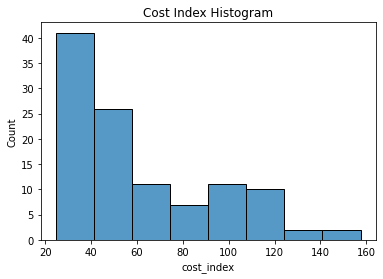

In [22]:
sns.histplot(data = df.cost_index).set(title = 'Cost Index Histogram')

[Text(0.5, 1.0, 'Monthly Income Histogram')]

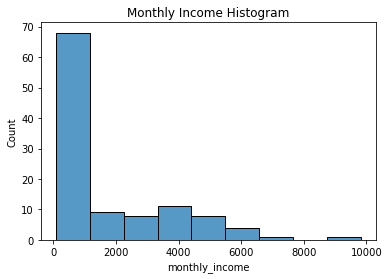

In [23]:
sns.histplot(data = df.monthly_income).set(title = 'Monthly Income Histogram')

[Text(0.5, 1.0, 'Purchasing Power Histrogram')]

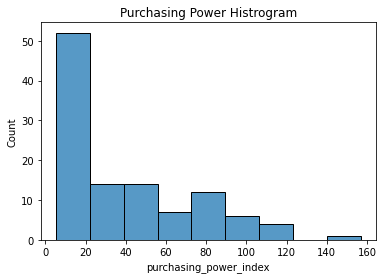

In [24]:
sns.histplot(data = df.purchasing_power_index).set(title = 'Purchasing Power Histrogram')

As we can see, all of the data has a leftward skew and is not normal. 

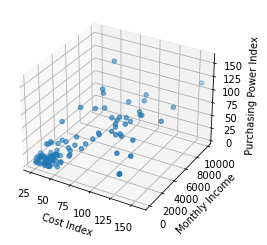

In [31]:
#3d scatter plot of the data
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

ax.scatter(
    df.cost_index,
    df.monthly_income,
    df.purchasing_power_index
)

ax.set_xlabel('Cost Index')
ax.set_ylabel('Monthly Income')
ax.set_zlabel('Purchasing Power Index')

plt.savefig('3d_scatter.png', dpi=1200)

plt.show()

[Text(0.5, 1.0, 'Cost Index vs Monthly Income')]

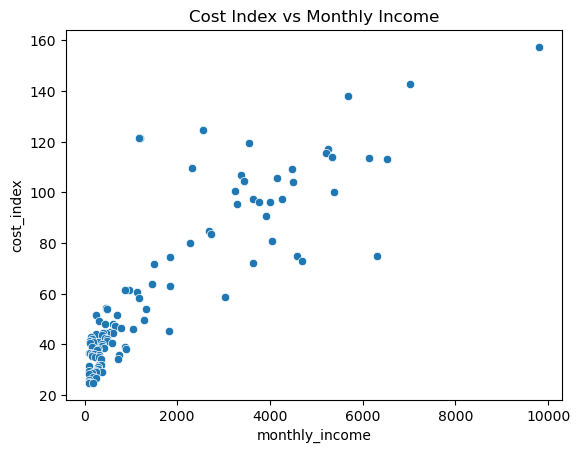

In [86]:
sns.scatterplot(x = X.monthly_income, y = y).set(title = 'Cost Index vs Monthly Income')

[Text(0.5, 1.0, 'Cost Index vs Purchasing Power')]

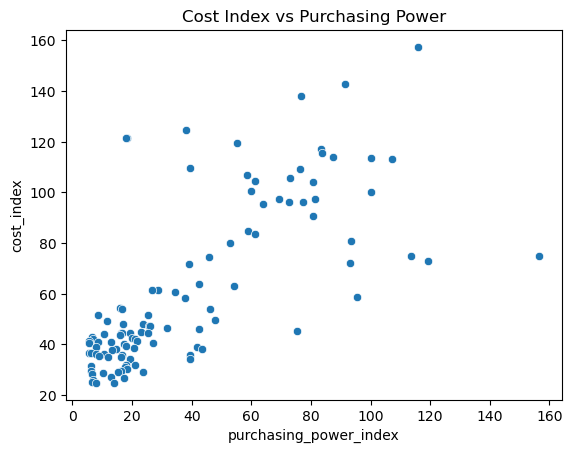

In [85]:
sns.scatterplot(x = X.purchasing_power_index, y = y).set(title = 'Cost Index vs Purchasing Power')

### Implementing Regression

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [88]:
regr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .5)

#### Monthly Income vs Cost Index 

In [89]:
regr.fit(X_train, y_train)

LinearRegression()

In [90]:
pred = regr.predict(X_test)

In [91]:
# The coefficients
print("Coefficients:", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, pred))


Coefficients: [ 0.02472268 -0.63723716]
Mean squared error: 304.60
Coefficient of determination: 0.74


In [92]:
'''
todo
    make 3d plot with regression plane
'''

'\ntodo\n    make 3d plot with regression plane\n'